# Import Packages

In [1]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, plot_confusion_matrix
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import make_column_selector, make_column_transformer
from imblearn.over_sampling import SMOTE
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Looking at the Data

In [2]:
df = pd.read_csv('../../../data/chocolate.csv')
df

,REF,Company (Manufacturer),Company Location,Review Date,Country of Bean Origin,Specific Bean Origin or Bar Name,Cocoa Percent,Ingredients,Most Memorable Characteristics,Rating
0,2454,5150,U.S.A.,2019,Madagascar,"Bejofo Estate, batch 1",76%,"3- B,S,C","cocoa, blackberry, full body",3.75
1,2458,5150,U.S.A.,2019,Dominican Republic,"Zorzal, batch 1",76%,"3- B,S,C","cocoa, vegetal, savory",3.50
2,2454,5150,U.S.A.,2019,Tanzania,"Kokoa Kamili, batch 1",76%,"3- B,S,C","rich cocoa, fatty, bready",3.25
3,797,A. Morin,France,2012,Peru,Peru,63%,"4- B,S,C,L","fruity, melon, roasty",3.75
4,797,A. Morin,France,2012,Bolivia,Bolivia,70%,"4- B,S,C,L","vegetal, nutty",3.50
...,...,...,...,...,...,...,...,...,...,...
2357,1205,Zotter,Austria,2014,Blend,Raw,80%,"4- B,S*,C,Sa","waxy, cloying, vegetal",2.75
2358,1996,Zotter,Austria,2017,Colombia,"APROCAFA, Acandi",75%,"3- B,S,C","strong nutty, marshmallow",3.75
2359,2170,Zotter,Austria,2018,Belize,Maya Mtn,72%,"3- B,S,C","muted, roasty, accessible",3.50
2360,2170,Zotter,Austria,2018,Congo,Mountains of the Moon,70%,"3- B,S,C","fatty, mild nuts, mild fruit",3.25


# Changing column name

In [3]:
df.columns = df.columns.str.lower()
df.columns = df.columns.str.replace(' ','_')

In [4]:
df

,ref,company_(manufacturer),company_location,review_date,country_of_bean_origin,specific_bean_origin_or_bar_name,cocoa_percent,ingredients,most_memorable_characteristics,rating
0,2454,5150,U.S.A.,2019,Madagascar,"Bejofo Estate, batch 1",76%,"3- B,S,C","cocoa, blackberry, full body",3.75
1,2458,5150,U.S.A.,2019,Dominican Republic,"Zorzal, batch 1",76%,"3- B,S,C","cocoa, vegetal, savory",3.50
2,2454,5150,U.S.A.,2019,Tanzania,"Kokoa Kamili, batch 1",76%,"3- B,S,C","rich cocoa, fatty, bready",3.25
3,797,A. Morin,France,2012,Peru,Peru,63%,"4- B,S,C,L","fruity, melon, roasty",3.75
4,797,A. Morin,France,2012,Bolivia,Bolivia,70%,"4- B,S,C,L","vegetal, nutty",3.50
...,...,...,...,...,...,...,...,...,...,...
2357,1205,Zotter,Austria,2014,Blend,Raw,80%,"4- B,S*,C,Sa","waxy, cloying, vegetal",2.75
2358,1996,Zotter,Austria,2017,Colombia,"APROCAFA, Acandi",75%,"3- B,S,C","strong nutty, marshmallow",3.75
2359,2170,Zotter,Austria,2018,Belize,Maya Mtn,72%,"3- B,S,C","muted, roasty, accessible",3.50
2360,2170,Zotter,Austria,2018,Congo,Mountains of the Moon,70%,"3- B,S,C","fatty, mild nuts, mild fruit",3.25


# Drop nulls, columns and change object to float

In [5]:
df = df.dropna()

In [6]:
df = df.drop(columns=['specific_bean_origin_or_bar_name', 'most_memorable_characteristics'])

In [7]:
df = df.replace('%', ' ', regex=True)

In [8]:
df['cocoa_percent'] = df['cocoa_percent'].astype(float)

In [9]:
df

,ref,company_(manufacturer),company_location,review_date,country_of_bean_origin,cocoa_percent,ingredients,rating
0,2454,5150,U.S.A.,2019,Madagascar,76.0,"3- B,S,C",3.75
1,2458,5150,U.S.A.,2019,Dominican Republic,76.0,"3- B,S,C",3.50
2,2454,5150,U.S.A.,2019,Tanzania,76.0,"3- B,S,C",3.25
3,797,A. Morin,France,2012,Peru,63.0,"4- B,S,C,L",3.75
4,797,A. Morin,France,2012,Bolivia,70.0,"4- B,S,C,L",3.50
...,...,...,...,...,...,...,...,...
2357,1205,Zotter,Austria,2014,Blend,80.0,"4- B,S*,C,Sa",2.75
2358,1996,Zotter,Austria,2017,Colombia,75.0,"3- B,S,C",3.75
2359,2170,Zotter,Austria,2018,Belize,72.0,"3- B,S,C",3.50
2360,2170,Zotter,Austria,2018,Congo,70.0,"3- B,S,C",3.25


# Filitering Data

In [10]:
location_to_keep = list(df['company_location'].value_counts()[:29].index)

In [11]:
filtered_df = df[df['company_location'].isin(location_to_keep)]

In [12]:
filtered_df

,ref,company_(manufacturer),company_location,review_date,country_of_bean_origin,cocoa_percent,ingredients,rating
0,2454,5150,U.S.A.,2019,Madagascar,76.0,"3- B,S,C",3.75
1,2458,5150,U.S.A.,2019,Dominican Republic,76.0,"3- B,S,C",3.50
2,2454,5150,U.S.A.,2019,Tanzania,76.0,"3- B,S,C",3.25
3,797,A. Morin,France,2012,Peru,63.0,"4- B,S,C,L",3.75
4,797,A. Morin,France,2012,Bolivia,70.0,"4- B,S,C,L",3.50
...,...,...,...,...,...,...,...,...
2357,1205,Zotter,Austria,2014,Blend,80.0,"4- B,S*,C,Sa",2.75
2358,1996,Zotter,Austria,2017,Colombia,75.0,"3- B,S,C",3.75
2359,2170,Zotter,Austria,2018,Belize,72.0,"3- B,S,C",3.50
2360,2170,Zotter,Austria,2018,Congo,70.0,"3- B,S,C",3.25


In [13]:
filtered_df.country_of_bean_origin.value_counts().head(32)

Venezuela             230
Peru                  199
Dominican Republic    199
Ecuador               189
Madagascar            153
Blend                 135
Nicaragua              87
Brazil                 72
Bolivia                72
Belize                 66
Colombia               65
Tanzania               64
Vietnam                62
Guatemala              56
Papua New Guinea       46
Mexico                 38
Trinidad               37
Costa Rica             30
Ghana                  30
U.S.A.                 28
Haiti                  26
Jamaica                22
Honduras               21
India                  20
Indonesia              16
Philippines            14
Grenada                13
Cuba                   12
Uganda                 12
Congo                  11
Fiji                   11
Solomon Islands        10
Name: country_of_bean_origin, dtype: int64

In [14]:
country_to_keep = list(filtered_df['country_of_bean_origin'].value_counts()[:32].index)

In [15]:
filtered_df = filtered_df[filtered_df['country_of_bean_origin'].isin(country_to_keep)]

In [16]:
filtered_df 

,ref,company_(manufacturer),company_location,review_date,country_of_bean_origin,cocoa_percent,ingredients,rating
0,2454,5150,U.S.A.,2019,Madagascar,76.0,"3- B,S,C",3.75
1,2458,5150,U.S.A.,2019,Dominican Republic,76.0,"3- B,S,C",3.50
2,2454,5150,U.S.A.,2019,Tanzania,76.0,"3- B,S,C",3.25
3,797,A. Morin,France,2012,Peru,63.0,"4- B,S,C,L",3.75
4,797,A. Morin,France,2012,Bolivia,70.0,"4- B,S,C,L",3.50
...,...,...,...,...,...,...,...,...
2357,1205,Zotter,Austria,2014,Blend,80.0,"4- B,S*,C,Sa",2.75
2358,1996,Zotter,Austria,2017,Colombia,75.0,"3- B,S,C",3.75
2359,2170,Zotter,Austria,2018,Belize,72.0,"3- B,S,C",3.50
2360,2170,Zotter,Austria,2018,Congo,70.0,"3- B,S,C",3.25


In [17]:
filtered_df.ingredients.value_counts().head(7)

3- B,S,C        816
2- B,S          597
4- B,S,C,L      225
5- B,S,C,V,L    174
4- B,S,C,V      132
2- B,S*          29
4- B,S*,C,Sa     19
Name: ingredients, dtype: int64

In [18]:
ingredients_to_keep = list(filtered_df['ingredients'].value_counts()[:7].index)

In [19]:
filtered_df = filtered_df[filtered_df['ingredients'].isin(ingredients_to_keep)]

In [20]:
filtered_df 

,ref,company_(manufacturer),company_location,review_date,country_of_bean_origin,cocoa_percent,ingredients,rating
0,2454,5150,U.S.A.,2019,Madagascar,76.0,"3- B,S,C",3.75
1,2458,5150,U.S.A.,2019,Dominican Republic,76.0,"3- B,S,C",3.50
2,2454,5150,U.S.A.,2019,Tanzania,76.0,"3- B,S,C",3.25
3,797,A. Morin,France,2012,Peru,63.0,"4- B,S,C,L",3.75
4,797,A. Morin,France,2012,Bolivia,70.0,"4- B,S,C,L",3.50
...,...,...,...,...,...,...,...,...
2357,1205,Zotter,Austria,2014,Blend,80.0,"4- B,S*,C,Sa",2.75
2358,1996,Zotter,Austria,2017,Colombia,75.0,"3- B,S,C",3.75
2359,2170,Zotter,Austria,2018,Belize,72.0,"3- B,S,C",3.50
2360,2170,Zotter,Austria,2018,Congo,70.0,"3- B,S,C",3.25


# Looking at data types before train test split

In [21]:
filtered_df.dtypes

ref                         int64
company_(manufacturer)     object
company_location           object
review_date                 int64
country_of_bean_origin     object
cocoa_percent             float64
ingredients                object
rating                    float64
dtype: object

In [22]:
# Change the Rating column to a string
filtered_df['rating'] = filtered_df['rating'].astype(float)

# Use 1's and 0's to find out what is a good rating of chocolate
filtered_df['rating'] = [1 if r >= 3.00 else 0 for r in filtered_df['rating']]

filtered_df

<ipython-input-22-202c07cff248>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['rating'] = filtered_df['rating'].astype(float)
<ipython-input-22-202c07cff248>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['rating'] = [1 if r >= 3.00 else 0 for r in filtered_df['rating']]


,ref,company_(manufacturer),company_location,review_date,country_of_bean_origin,cocoa_percent,ingredients,rating
0,2454,5150,U.S.A.,2019,Madagascar,76.0,"3- B,S,C",1
1,2458,5150,U.S.A.,2019,Dominican Republic,76.0,"3- B,S,C",1
2,2454,5150,U.S.A.,2019,Tanzania,76.0,"3- B,S,C",1
3,797,A. Morin,France,2012,Peru,63.0,"4- B,S,C,L",1
4,797,A. Morin,France,2012,Bolivia,70.0,"4- B,S,C,L",1
...,...,...,...,...,...,...,...,...
2357,1205,Zotter,Austria,2014,Blend,80.0,"4- B,S*,C,Sa",0
2358,1996,Zotter,Austria,2017,Colombia,75.0,"3- B,S,C",1
2359,2170,Zotter,Austria,2018,Belize,72.0,"3- B,S,C",1
2360,2170,Zotter,Austria,2018,Congo,70.0,"3- B,S,C",1


In [23]:
filtered_df['rating'].value_counts()

1    1577
0     415
Name: rating, dtype: int64

In [24]:
filtered_df.isna().sum()

ref                       0
company_(manufacturer)    0
company_location          0
review_date               0
country_of_bean_origin    0
cocoa_percent             0
ingredients               0
rating                    0
dtype: int64

# Modeling

Set X & Y

In [25]:
# Target
y = filtered_df['rating']
# Features
X = filtered_df.drop('rating', axis=1)

Train Test Split

In [26]:
# Initial Train-Test Split
X_tr, X_test, y_tr, y_test = train_test_split(X, y, random_state=2021)

In [27]:
# Validation Train-Test Split
X_train, X_val, y_train, y_val = train_test_split(X_tr, y_tr, random_state=2021)

Set num and cat Columns

In [28]:
num_cols = list(X.select_dtypes('number').columns)
num_cols

['ref', 'review_date', 'cocoa_percent']

In [29]:
cat_cols = list(X.select_dtypes('object').columns)
cat_cols

['company_(manufacturer)',
 'company_location',
 'country_of_bean_origin',
 'ingredients']

Scale the Data

In [30]:
# Instantiate StandardScaler
scaler = StandardScaler()

In [31]:
# fit on Imputed training data
scaler.fit(X_train[num_cols])

StandardScaler()

In [32]:
# transform training and validation data
X_train_scaled = pd.DataFrame(scaler.transform(X_train[num_cols]), columns=num_cols)
X_val_scaled = pd.DataFrame(scaler.transform(X_val[num_cols]), columns=num_cols)

In [33]:
X_train_scaled

,ref,review_date,cocoa_percent
0,-1.025853,-0.794754,-0.260765
1,0.202838,0.289441,-0.260765
2,0.030119,0.018393,-0.260765
3,-1.736388,-1.878949,-1.058188
4,0.930223,0.831539,-0.260765
...,...,...,...
1115,-0.177705,0.018393,3.327641
1116,-1.077809,-1.065803,-1.456900
1117,1.292512,1.373637,-0.260765
1118,-1.770089,-2.149998,1.732794


Encode the categorical data

In [34]:
ohe = OneHotEncoder(sparse=False, handle_unknown='ignore')

In [35]:
# fit on categorical data
ohe.fit(X_train[cat_cols])

OneHotEncoder(handle_unknown='ignore', sparse=False)

In [36]:
# transform training and validation data
X_train_encoded = ohe.transform(X_train[cat_cols])
X_val_encoded = ohe.transform(X_val[cat_cols])

In [37]:
X_train_encoded_df = pd.DataFrame(X_train_encoded, columns=ohe.get_feature_names())
X_val_encoded_df = pd.DataFrame(X_val_encoded, columns=ohe.get_feature_names())

In [38]:
X_train_encoded_df

,x0_5150,x0_A. Morin,x0_AMMA,x0_Acalli,x0_Aequare (Gianduja),x0_Akesson's (Pralus),x0_Altus aka Cao Artisan,x0_Amano,x0_Amatller (Simon Coll),x0_Amazona,...,x2_Uganda,x2_Venezuela,x2_Vietnam,"x3_2- B,S","x3_2- B,S*","x3_3- B,S,C","x3_4- B,S*,C,Sa","x3_4- B,S,C,L","x3_4- B,S,C,V","x3_5- B,S,C,V,L"
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1115,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1116,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1117,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1118,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [39]:
X_train_df = pd.concat([X_train_scaled, X_train_encoded_df], axis=1)
X_val_df = pd.concat([X_val_scaled, X_val_encoded_df], axis=1)

In [40]:
X_train_df.shape

(1120, 449)

In [41]:
X_val_df.shape


(374, 449)

First Logistic Regression Model

In [42]:
# Instantiate LogisticRegression
logreg = LogisticRegression(solver='liblinear')

Create a Modeling Function

In [43]:
def modeling_function(model, X_train, y_train, X_val, y_val):

    # fit model on training data
    model.fit(X_train, y_train)

    # make predictions on training and validation data
    train_preds = model.predict(X_train)
    val_preds = model.predict(X_val)

    # Print accuracy score
    print('Training accuracy: ', accuracy_score(y_train, train_preds))
    print('Validation accuracy: ', accuracy_score(y_val, val_preds))

    # return fitted model
    return model

In [44]:
# call modeling function
logreg = modeling_function(logreg, X_train_df, y_train, X_val_df, y_val)

Training accuracy:  0.8348214285714286
Validation accuracy:  0.786096256684492


The accuracy score looks like there is a lot of varriance.

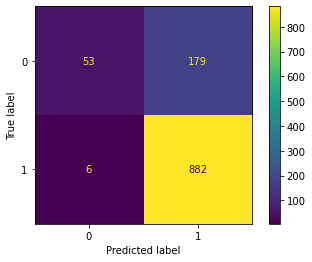

In [45]:
plot_confusion_matrix(logreg, X_train_df, y_train);

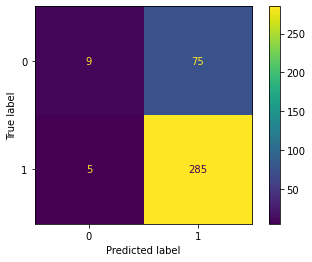

In [46]:
plot_confusion_matrix(logreg, X_val_df, y_val);

Use SMOTE to help fix this class imbalance and hopefully improve the model.

In [47]:
y.value_counts()

1    1577
0     415
Name: rating, dtype: int64

In [48]:
sm = SMOTE(random_state=2021)

In [49]:
X_train_res, y_train_res = sm.fit_resample(X_train_df, y_train)

In [50]:
y_train_res.value_counts()

1    888
0    888
Name: rating, dtype: int64

Second LogisticRegression using SMOTE

In [51]:
# Instantiate second LogisticRegression
logreg2 = LogisticRegression(solver='liblinear')

In [52]:
logreg2.fit(X_train_res, y_train_res)

LogisticRegression(solver='liblinear')

In [53]:
logreg2 = modeling_function(logreg2, X_train_res, y_train_res, X_val_df, y_val)

Training accuracy:  0.8671171171171171
Validation accuracy:  0.6737967914438503


In [54]:
C = [100, 10, 1, .1, .001]
for c in C:
    lg3 = LogisticRegression(penalty='l2', C=c, solver='liblinear')
    lg3.fit(X_train_df, y_train)
    print('C:', c)
    print('Training accuracy:', lg3.score(X_train_df, y_train))
    print('Test accuracy:', lg3.score(X_val_df, y_val))
    print('')


C: 100
Training accuracy: 0.8991071428571429
Test accuracy: 0.7566844919786097

C: 10
Training accuracy: 0.8955357142857143
Test accuracy: 0.7593582887700535

C: 1
Training accuracy: 0.8348214285714286
Test accuracy: 0.786096256684492

C: 0.1
Training accuracy: 0.7955357142857142
Test accuracy: 0.767379679144385

C: 0.001
Training accuracy: 0.7928571428571428
Test accuracy: 0.7754010695187166



Third Logistic Regression editing Parameters

In [55]:
logreg3 = LogisticRegression(solver='liblinear', penalty='l1', C=10)

In [56]:
# Call modeling function
logreg3 = modeling_function(logreg3, X_train_res, y_train_res, X_val_df, y_val)

Training accuracy:  0.8930180180180181
Validation accuracy:  0.7112299465240641


Desicion Tree Classifier

In [57]:
dt = DecisionTreeClassifier(random_state=2021)

In [58]:
dt = modeling_function(dt, X_train_res, y_train_res, X_val_df, y_val)

Training accuracy:  0.9988738738738738
Validation accuracy:  0.7032085561497327


In [59]:
dt2 = DecisionTreeClassifier(random_state=2021, max_depth=10)

In [60]:
dt2 = modeling_function(dt2, X_train_res, y_train_res, X_val_df, y_val)

Training accuracy:  0.803490990990991
Validation accuracy:  0.7299465240641712


In [61]:
rf = RandomForestClassifier(random_state=2021)

In [62]:
rf = modeling_function(rf, X_train_res, y_train_res, X_val_df, y_val)

Training accuracy:  0.9988738738738738
Validation accuracy:  0.7459893048128342


In [63]:
# Create Param Grid 
param_grid = {'n_estimators': [50, 75, 100],
                'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 10],
                'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}

In [64]:
# Create GridSearchCV
rf_gs = GridSearchCV(estimator=rf, param_grid=param_grid, scoring='accuracy')

In [65]:
rf_gs.fit(X_train_res, y_train_res)

GridSearchCV(estimator=RandomForestClassifier(random_state=2021),
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 10],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'n_estimators': [50, 75, 100]},
             scoring='accuracy')

In [66]:
best_model = rf_gs.best_estimator_

In [67]:
rf_gs.best_params_

{'max_depth': 10, 'min_samples_leaf': 1, 'n_estimators': 100}

In [68]:
modeling_function(best_model, X_train_res, y_train_res, X_val_df, y_val)

Training accuracy:  0.8834459459459459
Validation accuracy:  0.7005347593582888


RandomForestClassifier(max_depth=10, random_state=2021)

In [69]:
#At this point, my best performing model is actually the second 
#LogisticRegression model. I need to transform my test data and see 
#how this model performs on unseen data

In [70]:
X_test_scaled = pd.DataFrame(scaler.transform(X_test[num_cols]), columns=num_cols)
X_test_encoded = pd.DataFrame(ohe.transform(X_test[cat_cols]), columns=ohe.get_feature_names())

In [71]:
X_test_df = pd.concat([X_test_scaled, X_test_encoded], axis=1)

In [72]:
X_test_df.shape

(498, 449)

In [73]:
test_preds = logreg.predict(X_test_df)

In [74]:
accuracy_score(y_test, test_preds)

0.8032128514056225